In [1]:
#From https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net_(ax, left, right, bottom, top, layer_sizes,
coefs_, 
intercepts_,
n_iter_, 
loss_, 
np, plt):
    '''
    Draw a neural network cartoon using matplotilb.

    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
        - coefs_ :(list) length (n_layers - 1) The ith element in the list represents the weight matrix corresponding to layer i.
        - intercepts_ : (list) length (n_layers - 1)The ith element in the list represents the bias vector corresponding to layer i + 1.
        - n_iter_ : (int) The number of iterations the solver has ran.
        - loss_ : (float) The current loss computed with the loss function.
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Input-Arrows
    layer_top_0 = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
    for m in xrange(layer_sizes[0]):
        plt.arrow(left-0.15, layer_top_0 - m*v_spacing, 0.10, 0,  lw =1, head_width=0.01, head_length=0.02)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,color='w', ec='k', zorder=4)
#             plt.plot(n*h_spacing + left, layer_top - m*v_spacing, 'o', mfc='w', mec='k', ls= '-', markersize = 40)

    # Add texts
            if n == 0:
                plt.text(left-0.125, layer_top - m*v_spacing, r'$X_{'+str(m+1)+'}$', fontsize=15)
            elif (n_layers == 3) & (n == 1):
                plt.text(n*h_spacing + left+0.00, layer_top - m*v_spacing+ (v_spacing/8.+0.01*v_spacing), r'$H_{'+str(m+1)+'}$', fontsize=15)
            elif n == n_layers -1:
                plt.text(n*h_spacing + left+0.10, layer_top - m*v_spacing, r'$y_{'+str(m+1)+'}$', fontsize=15)
            ax.add_artist(circle)# 
        
            plt.text(n*h_spacing + left+0.05, layer_top+0.01 - m*v_spacing, r'a', fontsize=15)                                    
    # Edges between nodes
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            print(m)
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                xm = (n*h_spacing + left)
                xo = ((n + 1)*h_spacing + left)
                ym = (layer_top_a - m*v_spacing)
                yo = (layer_top_b - o*v_spacing)
                rot_mo_rad = np.arctan((yo-ym)/(xo-xm))
                rot_mo_deg = rot_mo_rad*180./np.pi
                xm1 = xm + (v_spacing/8.+0.05)*np.cos(rot_mo_rad)
                if n == 0:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)                               
                    else:
                        ym1 = ym + (v_spacing/8.+0.05)*np.sin(rot_mo_rad)
                        ym1 = ym1 + 0.01                           
                else:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)       
                    else:
                        ym1 = ym + (v_spacing/8.+0.04)*np.sin(rot_mo_rad)
                        ym1 = ym1 + 0.01                           
              
                plt.text( xm1, ym1,\
                         coefs[n][m],\
                         rotation = rot_mo_deg, \
                         fontsize = 10)
#     # Edges between bias and nodes
#     for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
#         if n < n_layers-1:
#             layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
#             layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
#         for m in xrange(layer_size_a):
#             x_bias = (n+0.5)*h_spacing + left
#             y_bias = top + 0.005 
#         for o in xrange(layer_size_b):
#             print(o)
#             line = plt.Line2D([x_bias, (n + 1)*h_spacing + left],
#                           [y_bias, layer_top_b - o*v_spacing], c='k')
#             ax.add_artist(line)
#             xo = ((n + 1)*h_spacing + left)
#             yo = (layer_top_b - o*v_spacing)
#             rot_bo_rad = np.arctan((yo-y_bias)/(xo-x_bias))
#             rot_bo_deg = rot_bo_rad*180./np.pi
#             xo2 = xo - (v_spacing/8.+0.01)*np.cos(rot_bo_rad)
#             yo2 = yo - (v_spacing/8.+0.01)*np.sin(rot_bo_rad)
#             xo1 = xo2 -0.05 *np.cos(rot_bo_rad)
#             yo1 = yo2 -0.05 *np.sin(rot_bo_rad)
#             plt.text( xo1, yo1,\
#                  str("HELLO"),\
#                  rotation = rot_bo_deg, \
#                  fontsize = 10)    
    # Output-Arrows
    layer_top_0 = v_spacing*(layer_sizes[-1] - 1)/2. + (top + bottom)/2.
    for m in xrange(layer_sizes[-1]):
        plt.arrow(right+0.015, layer_top_0 - m*v_spacing, 0.16*h_spacing, 0,  lw =1, head_width=0.01, head_length=0.02)
    # Record the n_iter_ and loss
    plt.text(left + (right-left)/3., bottom - 0.005*v_spacing, \
             'Steps:'+str(n_iter_)+'    Loss: ' + str(round(loss_, 6)), fontsize = 15)
    #----------------------------------------------------------------------------------------------------------------------------------

NameError: name 'xrange' is not defined

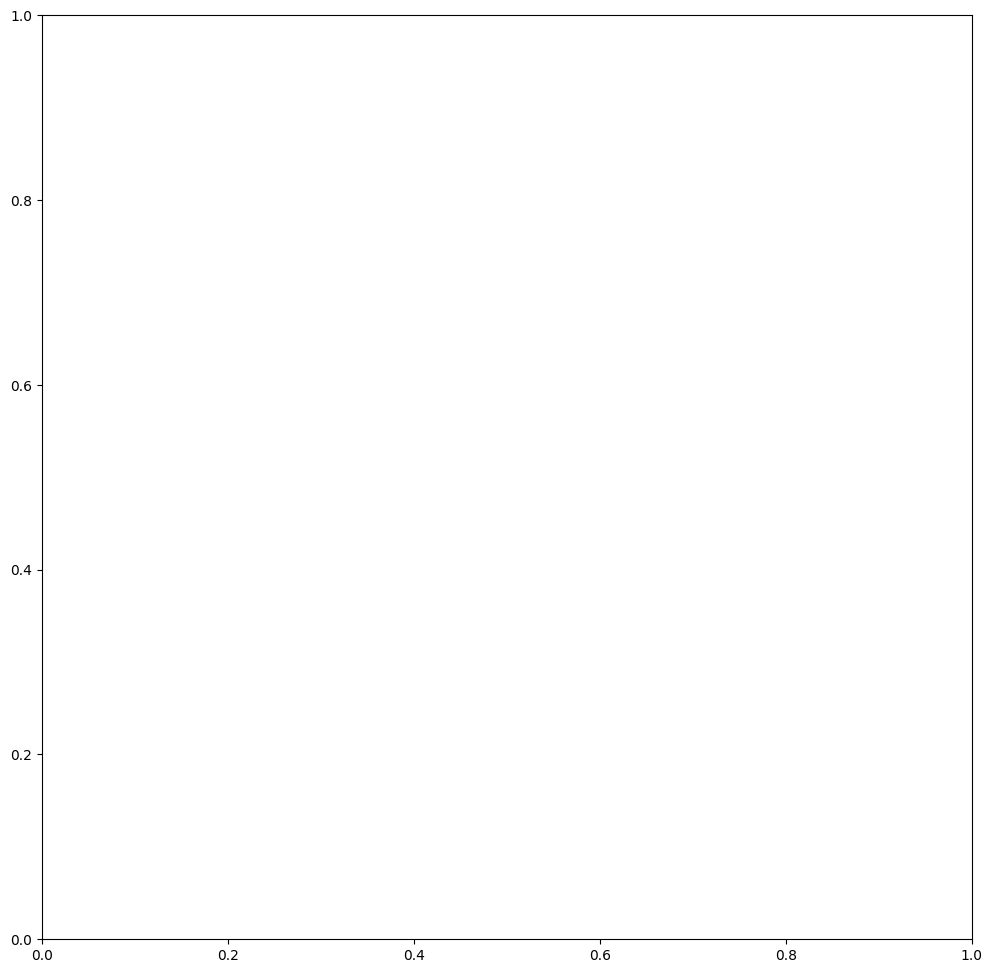

In [2]:
#You can use this function to make plot of the neural net!
# import draw_neural_net_
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
# ax.axis('off')

n_units = 2

coefs = np.array([[ 0.3,      0.084,    0.00588],
             [ 0.04,     0.027,    0.01512]])

draw_neural_net_(ax, .25, .75, .25, .75, [n_units, n_units, n_units],
coefs, 
[],
1,
0.5,
np, plt)
plt.savefig("neural_network.pdf", bbox_inches='tight', dpi=1200)
plt.show()